CNN Architecture
Build a model using each TL architecture. i. Load the model from keras. ii. Take few random images , predict their lables. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

Using TensorFlow backend.


In [3]:
df_train = pd.read_csv('train.csv')
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, 0]

In [4]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
# Normalize inputs
X_train = X_train / 255.0

In [8]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

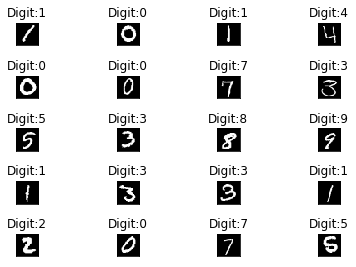

In [9]:
plot_digits(X_train, Y_train)

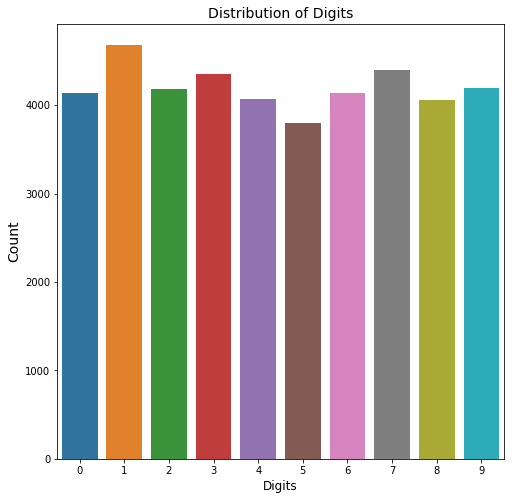

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(Y_train)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [11]:
#Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [12]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               307456    
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [15]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [16]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [17]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

In [18]:
model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100, 
                    epochs=30, validation_data=(X_val, T_val), callbacks=[reduce_lr])

Epoch 1/30
408/407 [==============================] - 61s 148ms/step - loss: 0.4616 - accuracy: 0.8539 - val_loss: 0.0998 - val_accuracy: 0.9651
Epoch 2/30
  1/407 [..............................] - ETA: 52s - loss: 0.0721 - accuracy: 0.9800

D:\Python\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


408/407 [==============================] - 61s 149ms/step - loss: 0.1318 - accuracy: 0.9594 - val_loss: 0.0613 - val_accuracy: 0.9778
Epoch 3/30
408/407 [==============================] - 60s 147ms/step - loss: 0.0955 - accuracy: 0.9699 - val_loss: 0.0474 - val_accuracy: 0.9841
Epoch 4/30
408/407 [==============================] - 63s 156ms/step - loss: 0.0772 - accuracy: 0.9767 - val_loss: 0.0493 - val_accuracy: 0.9849
Epoch 5/30
408/407 [==============================] - 60s 148ms/step - loss: 0.0636 - accuracy: 0.9805 - val_loss: 0.0327 - val_accuracy: 0.9889
Epoch 6/30
408/407 [==============================] - 62s 153ms/step - loss: 0.0592 - accuracy: 0.9816 - val_loss: 0.0352 - val_accuracy: 0.9889
Epoch 7/30
408/407 [==============================] - 62s 151ms/step - loss: 0.0525 - accuracy: 0.9831 - val_loss: 0.0291 - val_accuracy: 0.9937
Epoch 8/30
408/407 [==============================] - 62s 152ms/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0312 - val_accuracy: 0.9

In [19]:
score = model.evaluate(X_val, T_val, batch_size=32)

1260/1260 [==============================] - 1s 415us/step


In [20]:
score

[0.029007391941304955, 0.9928571581840515]

# Let's predict test data

In [21]:
df_test = pd.read_csv('test.csv')
X_test = np.array(df_test)
X_test = X_test/255.0

In [22]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)

In [23]:
Y_test = np.argmax(Y_test, axis=1)
Y_test[:5]

array([2, 0, 9, 0, 3], dtype=int64)

Create submission file

In [24]:
df_out = pd.read_csv('sample_submission.csv')
df_out['Label'] = Y_test
df_out.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [25]:
df_out.to_csv('out.csv', index=False)

In [ ]:
#Inspired by
#https://www.kaggle.com/curiousprogrammer/lenet-5-cnn-with-keras-99-48